In [248]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

* Reading the csv file containing Salary Data

In [183]:
data=pd.read_csv('Salary_Data.csv')

In [184]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [185]:
data.shape

(30, 2)

In [186]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
Salary             30 non-null float64
dtypes: float64(2)
memory usage: 560.0 bytes


In [188]:
#data.YearsExperience=data.YearsExperience.astype(int)
#data.Salary=data.Salary.astype(int)

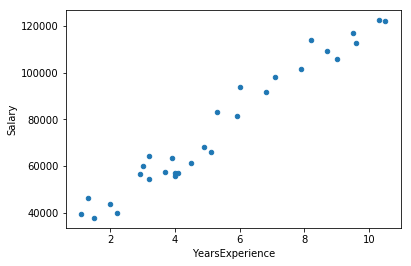

In [189]:
data.plot.scatter(x='YearsExperience', y='Salary')

* The plot shows somewhat Linear relationship between Experience and Salary

In [190]:
X = data.iloc[:, :-1].values

In [191]:
Y = data.iloc[:, 1].values

* Splitting our Data into training and Test Data

In [192]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=0)

* Creating an object of Linear Regression

In [193]:
regressor=LinearRegression()

In [194]:
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

* Predictions using this regressor on the Test Data

In [195]:
Y_pred=regressor.predict(X_test)

# Visualizaion of the result

* Check graphs of Predicted values and Actual values

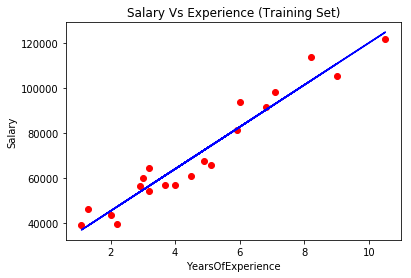

In [197]:

plt.scatter(X_train,Y_train,color='red')
plt.plot(X_train,regressor.predict(X_train),color='blue')
plt.title('Salary Vs Experience (Training Set)')
plt.xlabel('YearsOfExperience')
plt.ylabel('Salary')
plt.show()



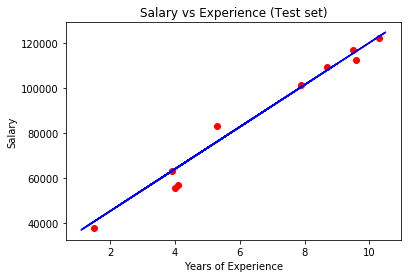

In [198]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [201]:
regressor.score(X_train,Y_train)

0.9381900012894278

In [202]:
regressor.score(X_test,Y_test)

0.9749154407708353

In [207]:
regressor.coef_

array([9345.94244312])

In [208]:
regressor.intercept_

26816.19224403119

* Q-Q plot is used to check Normality of the Independent variables

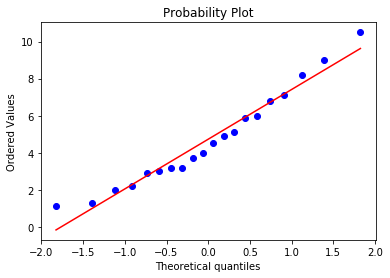

In [246]:
import scipy.stats as stats

stats.probplot(X_train.reshape(20,), dist="norm", plot=plt)
plt.show()

* residual vs Fitted value curve is used to check Linearity and Homoskedasticity

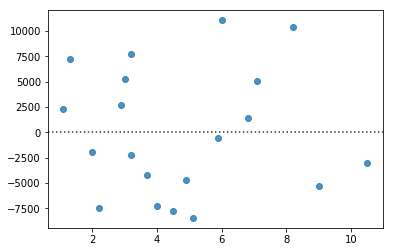

In [249]:
sns.residplot(X_train,Y_train,data=data)

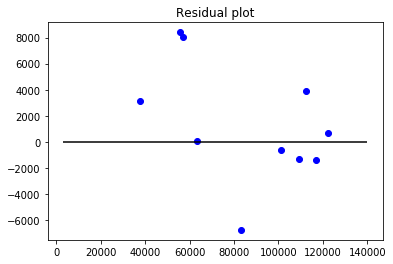

In [257]:
x_plot = plt.scatter(Y_test, (Y_pred - Y_test), c='b')
plt.hlines(y=0,xmin=3000,xmax=140000)


plt.title('Residual plot')
plt.show()